In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Load the image
image_path = "/content/Modern Car Driving City.jpg"
image = cv2.imread(image_path)

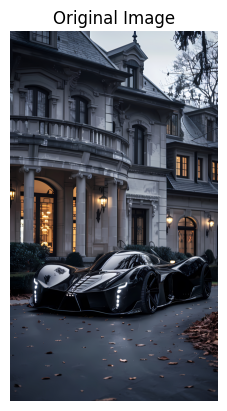

Image Size: 3264x5824
Total Pixels: 19009536


In [2]:
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite("image_rgb.jpg", image_rgb)

# Display the image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Extract image size
height, width, channels = image.shape
print(f"Image Size: {width}x{height}")

# Calculate total pixels
total_pixels = width * height
print(f"Total Pixels: {total_pixels}")

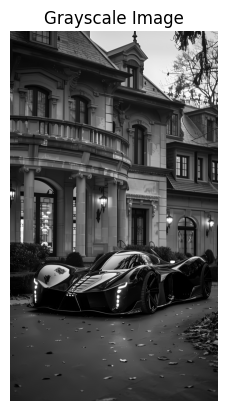

In [3]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)

plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

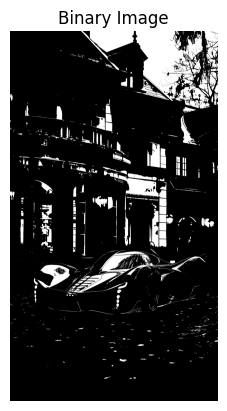

Black Pixel Count: 16536326


In [4]:
# Convert to binary using threshold
threshold_value = 127
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# Count black pixels in binary image
black_pixels = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixels}")

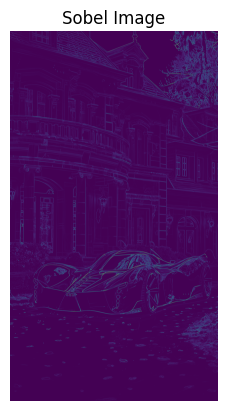

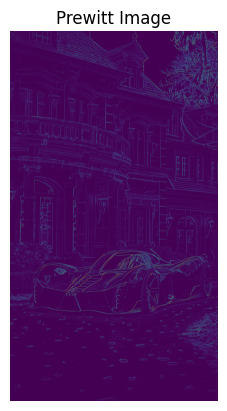

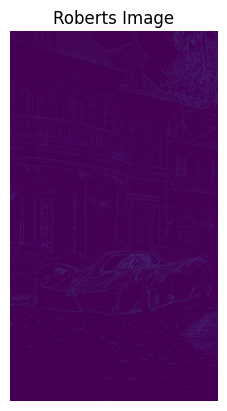

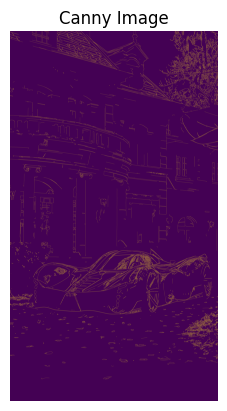

In [5]:
# Task 2 - Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
cv2.imwrite("sobel_edge.jpg", sobel)

prewitt_x = cv2.filter2D(gray_image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(gray_image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt = np.hypot(prewitt_x, prewitt_y)
cv2.imwrite("prewitt_edge.jpg", prewitt)

roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
roberts_edge_x = cv2.filter2D(gray_image, -1, roberts_x)
roberts_edge_y = cv2.filter2D(gray_image, -1, roberts_y)
roberts = np.hypot(roberts_edge_x, roberts_edge_y)
cv2.imwrite("roberts_edge.jpg", roberts)

canny_edges = cv2.Canny(gray_image, 100, 200)
cv2.imwrite("canny_edge.jpg", canny_edges)

plt.imshow(sobel)
plt.title("Sobel Image")
plt.axis("off")
plt.show()

plt.imshow(prewitt)
plt.title("Prewitt Image")
plt.axis("off")
plt.show()

plt.imshow(roberts)
plt.title("Roberts Image")
plt.axis("off")
plt.show()

plt.imshow(canny_edges)
plt.title("Canny Image")
plt.axis("off")
plt.show()

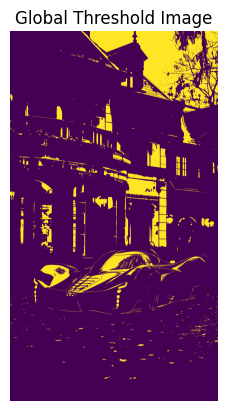

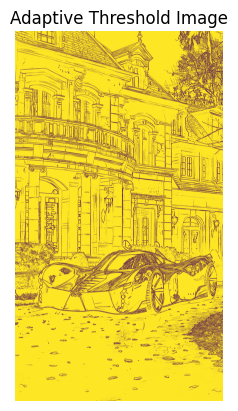

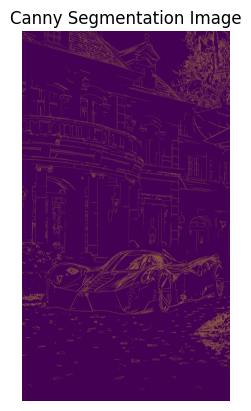

In [6]:
# Image Segmentation
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("global_threshold.jpg", global_thresh)

adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
cv2.imwrite("adaptive_threshold.jpg", adaptive_thresh)

canny_segmentation = cv2.Canny(gray_image, 50, 150)
cv2.imwrite("canny_segmentation.jpg", canny_segmentation)

plt.imshow(global_thresh)
plt.title("Global Threshold Image")
plt.axis("off")
plt.show()

plt.imshow(adaptive_thresh)
plt.title("Adaptive Threshold Image")
plt.axis("off")
plt.show()

plt.imshow(canny_segmentation)
plt.title("Canny Segmentation Image")
plt.axis("off")
plt.show()

Processing Complete.


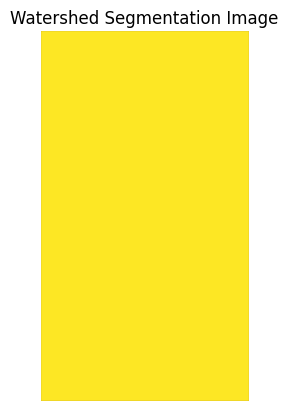

In [7]:
# Watershed Algorithm
gray_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
gradient = cv2.morphologyEx(gray_blurred, cv2.MORPH_GRADIENT, np.ones((3,3), np.uint8))
_, markers = cv2.connectedComponents(cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1])
markers = markers + 1
labels = cv2.watershed(image, markers)
cv2.imwrite("watershed_segmentation.jpg", (labels > 0).astype(np.uint8) * 255)

print("Processing Complete.")


plt.imshow(labels > 0)
plt.title("Watershed Segmentation Image")
plt.axis("off")
plt.show()